# Lab Instructions

You are working as an analyst for a consulting agency that has been hired to study and improve productivity at a mid-sized company.  Morale is very low and, after speaking with employees, several common complaints kept coming up:

* New employees complained that more tenured employees were lazy and unproductive.
* More tenured employees complained that the newer employees didn't focus and were therefore unproductive.
* Managers were worried that remote workers might be less productive.
* In-person employees found it impossible to focus and be productive when their desk was in the open plan area.
* Many people said they had so much administrative work to do they could only be truly productive if they worked overtime.
* Everyone complained that there were too many meetings.

The consulting agency carefully collected data on a number of factors including number of years at the company, focus (higher is better), productivity (higher is better), department, meetings per week, and desk location can be found in Employee_productivity.csv.

1. Determine which feature - years at the company, hours worked, or focus - has the strongest linear relationship with productivity.  Show a visualization and calculate R-squared for all three relationships to justify your answer.

2. Build on that linear regression model to determine what other featuers also impact productivity. Using both visualzations and R-squared values, build a model that can predicts employee productivity at this company. Evaluate each feature in the dataset.

3. Write a short (a few sentences) summary of how the different factors in the data relate to employee productivity.  What recommendations would you make so that employees can be as productive as possible?

**For the purposes of this lab you MUST use the model building techniques we covered in class.  Failure to do so will automatically result in a 20 point deduction.  I really want you to think about what you are doing and not just paste what you get from ChatGPT (which will often NOT do the correct thing by default).**



In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# Load the employee productivity data
df = pd.read_csv('Employee_productivity.csv')

# Display basic information
print("Dataset shape:", df.shape)
print("\nFirst few rows:")
print(df.head())
print("\nColumn names and types:")
print(df.dtypes)
print("\nBasic statistics:")
print(df.describe())

Dataset shape: (300, 7)

First few rows:
   HoursWorked  FocusScore  ProductivityScore   Department  YearsAtCompany  \
0         42.4         6.3            3127.96  Engineering              17   
1         34.0         7.2            4742.60           HR               8   
2         47.2         5.6            2044.73        Sales              15   
3         38.4         9.0            5818.92           HR               5   
4         36.4         2.5            1841.31        Sales               9   

   TeamMeetingsPerWeek    DeskLocation  
0                    0       Open Plan  
1                    6  Private Office  
2                    3          Remote  
3                    6  Private Office  
4                    6          Remote  

Column names and types:
HoursWorked            float64
FocusScore             float64
ProductivityScore      float64
Department              object
YearsAtCompany           int64
TeamMeetingsPerWeek      int64
DeskLocation            object
dt

# Question 1: Which feature has the strongest linear relationship with productivity?

I need to look at three features to see which one has the best relationship with ProductivityScore:
1. YearsAtCompany
2. HoursWorked  
3. FocusScore

I'll make scatterplots with regression lines and check the R-squared values to see which one explains the most variation.

## 1a. Years at Company vs Productivity

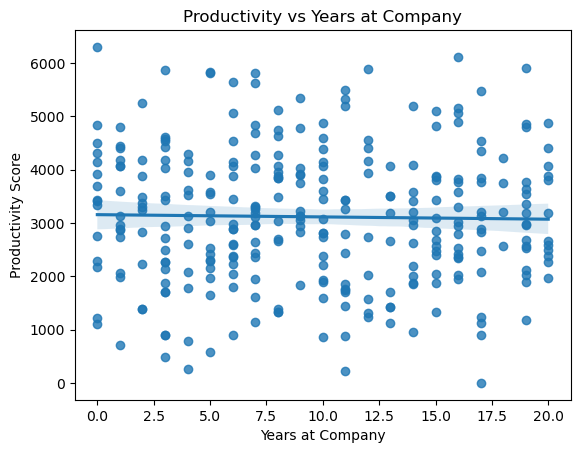

Years at Company Model Summary:
                            OLS Regression Results                            
Dep. Variable:      ProductivityScore   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                    0.1227
Date:                Sat, 13 Dec 2025   Prob (F-statistic):              0.726
Time:                        01:02:54   Log-Likelihood:                -2564.1
No. Observations:                 300   AIC:                             5132.
Df Residuals:                     298   BIC:                             5140.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const       

In [2]:
# Scatterplot with regression line for Years at Company
sns.regplot(x='YearsAtCompany', y='ProductivityScore', data=df)
plt.title('Productivity vs Years at Company')
plt.xlabel('Years at Company')
plt.ylabel('Productivity Score')
plt.show()

# Calculate R-squared using OLS
X = sm.add_constant(df['YearsAtCompany'])
y = df['ProductivityScore']
model_years = sm.OLS(y, X).fit()

print("Years at Company Model Summary:")
print(model_years.summary())
print(f"\nR-squared: {model_years.rsquared:.4f}")

## 1b. Hours Worked vs Productivity

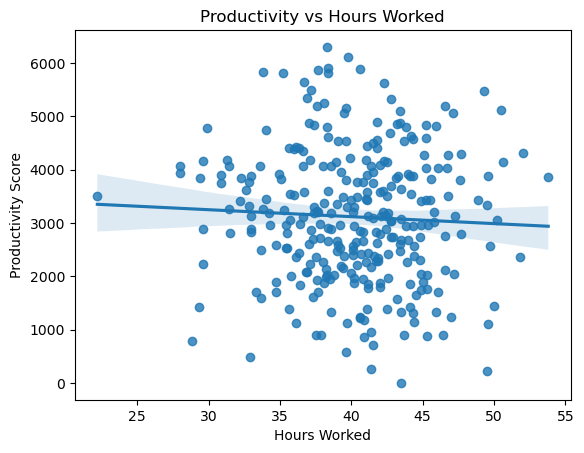

Hours Worked Model Summary:
                            OLS Regression Results                            
Dep. Variable:      ProductivityScore   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.7768
Date:                Sat, 13 Dec 2025   Prob (F-statistic):              0.379
Time:                        01:02:57   Log-Likelihood:                -2563.7
No. Observations:                 300   AIC:                             5131.
Df Residuals:                     298   BIC:                             5139.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        3638.4153

In [3]:
# Scatterplot with regression line for Hours Worked
sns.regplot(x='HoursWorked', y='ProductivityScore', data=df)
plt.title('Productivity vs Hours Worked')
plt.xlabel('Hours Worked')
plt.ylabel('Productivity Score')
plt.show()

# Calculate R-squared using OLS
X = sm.add_constant(df['HoursWorked'])
y = df['ProductivityScore']
model_hours = sm.OLS(y, X).fit()

print("Hours Worked Model Summary:")
print(model_hours.summary())
print(f"\nR-squared: {model_hours.rsquared:.4f}")

## 1c. Focus Score vs Productivity

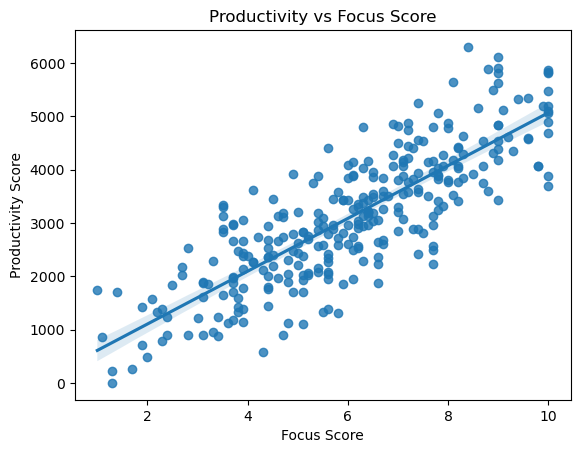

Focus Score Model Summary:
                            OLS Regression Results                            
Dep. Variable:      ProductivityScore   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.677
Method:                 Least Squares   F-statistic:                     626.6
Date:                Sat, 13 Dec 2025   Prob (F-statistic):           3.02e-75
Time:                        01:02:59   Log-Likelihood:                -2394.3
No. Observations:                 300   AIC:                             4793.
Df Residuals:                     298   BIC:                             4800.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        114.3813    

In [4]:
# Scatterplot with regression line for Focus Score
sns.regplot(x='FocusScore', y='ProductivityScore', data=df)
plt.title('Productivity vs Focus Score')
plt.xlabel('Focus Score')
plt.ylabel('Productivity Score')
plt.show()

# Calculate R-squared using OLS
X = sm.add_constant(df['FocusScore'])
y = df['ProductivityScore']
model_focus = sm.OLS(y, X).fit()

print("Focus Score Model Summary:")
print(model_focus.summary())
print(f"\nR-squared: {model_focus.rsquared:.4f}")

## 1d. Comparison and Conclusion for Question 1

In [23]:
# Compare the three features
print("=" * 50)
print("COMPARISON OF FEATURES")
print("=" * 50)
print()

# Create dictionary of features and their R-squared values
r_squared_dict = {
    'Years at Company': model_years.rsquared,
    'Hours Worked': model_hours.rsquared,
    'Focus Score': model_focus.rsquared
}

print(f"Years at Company R-squared: {model_years.rsquared:.4f}")
print(f"Hours Worked R-squared:     {model_hours.rsquared:.4f}")
print(f"Focus Score R-squared:      {model_focus.rsquared:.4f}")

# Identify strongest predictor
strongest_feature = max(r_squared_dict, key=r_squared_dict.get)
print(f"\nStrongest predictor: {strongest_feature}")
print(f"R-squared = {r_squared_dict[strongest_feature]:.4f}")

COMPARISON OF FEATURES

Years at Company R-squared: 0.0004
Hours Worked R-squared:     0.0026
Focus Score R-squared:      0.6777

Strongest predictor: Focus Score
R-squared = 0.6777


# Question 2: Building the productivity model

Since focus score explains most of the variation in productivity, I'll see if adding other features improves the model. I'll test each remaining variable in the dataset:
- Department 
- TeamMeetingsPerWeek
- DeskLocation
- YearsAtCompany (was weak on its own, but might help when combined)
- HoursWorked (also weak alone, testing if it adds anything)

## 2a. Starting point - Focus Score only

In [ ]:
print("BASE MODEL: Focus Score only")
print(f"R-squared = {model_focus.rsquared:.4f}\n")

BASE MODEL: Focus Score only
R² = 0.6777



## 2b. Testing Desk Location

In [18]:
# Add Desk Location (categorical feature)
df_model = df[['FocusScore', 'DeskLocation', 'ProductivityScore']].copy()

# Create dummy variables for desk location (drop_first=True to avoid multicollinearity)
desk_dummies = pd.get_dummies(df_model['DeskLocation'], prefix='Desk', drop_first=True, dtype=int)
df_model = pd.concat([df_model, desk_dummies], axis=1)

# Build model with Focus + Desk Location
X = sm.add_constant(df_model[['FocusScore', 'Desk_Private Office', 'Desk_Remote']])
y = df_model['ProductivityScore']
model_focus_desk = sm.OLS(y, X).fit()

print("MODEL: Focus Score + Desk Location")
print(model_focus_desk.summary())
print(f"\nR-squared = {model_focus_desk.rsquared:.4f}")
print(f"Change in R-squared = {model_focus_desk.rsquared - model_focus.rsquared:.4f}")

MODEL: Focus Score + Desk Location
                            OLS Regression Results                            
Dep. Variable:      ProductivityScore   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     211.5
Date:                Sat, 13 Dec 2025   Prob (F-statistic):           2.71e-73
Time:                        01:22:46   Log-Likelihood:                -2392.3
No. Observations:                 300   AIC:                             4793.
Df Residuals:                     296   BIC:                             4807.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------

## 2c. Testing Team Meetings

In [19]:
# Add Team Meetings
df_model['TeamMeetingsPerWeek'] = df['TeamMeetingsPerWeek']
X = sm.add_constant(df_model[['FocusScore', 'Desk_Private Office', 'Desk_Remote', 'TeamMeetingsPerWeek']])
y = df_model['ProductivityScore']
model_add_meetings = sm.OLS(y, X).fit()

print("MODEL: Focus + Desk Location + Team Meetings")
print(model_add_meetings.summary())
print(f"\nR-squared = {model_add_meetings.rsquared:.4f}")
print(f"Change in R-squared = {model_add_meetings.rsquared - model_focus_desk.rsquared:.4f}")

MODEL: Focus + Desk Location + Team Meetings
                            OLS Regression Results                            
Dep. Variable:      ProductivityScore   R-squared:                       0.683
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     159.0
Date:                Sat, 13 Dec 2025   Prob (F-statistic):           2.38e-72
Time:                        01:22:52   Log-Likelihood:                -2391.7
No. Observations:                 300   AIC:                             4793.
Df Residuals:                     295   BIC:                             4812.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

## 2d. Testing Department

In [20]:
# Add Department
df_model2 = df[['FocusScore', 'DeskLocation', 'TeamMeetingsPerWeek', 'Department', 'ProductivityScore', 'YearsAtCompany', 'HoursWorked']].copy()

# Create dummies for both categorical features
desk_dummies = pd.get_dummies(df_model2['DeskLocation'], prefix='Desk', drop_first=True, dtype=int)
dept_dummies = pd.get_dummies(df_model2['Department'], prefix='Dept', drop_first=True, dtype=int)
df_model2 = pd.concat([df_model2, desk_dummies, dept_dummies], axis=1)

# Build the model
feature_cols = ['FocusScore', 'TeamMeetingsPerWeek', 'Desk_Private Office', 'Desk_Remote', 'Dept_HR', 'Dept_Marketing', 'Dept_Sales']
X = sm.add_constant(df_model2[feature_cols])
y = df_model2['ProductivityScore']
model_add_dept = sm.OLS(y, X).fit()

print("MODEL: Focus + Desk + Meetings + Department")
print(model_add_dept.summary())
print(f"\nR-squared = {model_add_dept.rsquared:.4f}")
print(f"Change in R-squared = {model_add_dept.rsquared - model_add_meetings.rsquared:.4f}")

MODEL: Focus + Desk + Meetings + Department
                            OLS Regression Results                            
Dep. Variable:      ProductivityScore   R-squared:                       0.685
Model:                            OLS   Adj. R-squared:                  0.677
Method:                 Least Squares   F-statistic:                     90.53
Date:                Sat, 13 Dec 2025   Prob (F-statistic):           2.15e-69
Time:                        01:22:58   Log-Likelihood:                -2391.0
No. Observations:                 300   AIC:                             4798.
Df Residuals:                     292   BIC:                             4828.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------

## 2e. Testing the weak predictors - Years and Hours

These didn't explain much on their own, but maybe they add something when combined with the other variables.

In [21]:
# Test adding Years at Company
feature_cols = ['FocusScore', 'TeamMeetingsPerWeek', 'Desk_Private Office', 'Desk_Remote', 
                'Dept_HR', 'Dept_Marketing', 'Dept_Sales', 'YearsAtCompany']
X = sm.add_constant(df_model2[feature_cols])
y = df_model2['ProductivityScore']
model_add_years = sm.OLS(y, X).fit()

print("Model: Adding Years at Company")
print(f"R-squared = {model_add_years.rsquared:.4f}")
print(f"Change in R-squared = {model_add_years.rsquared - model_add_dept.rsquared:.4f}\n")

# Test adding Hours Worked
feature_cols = ['FocusScore', 'TeamMeetingsPerWeek', 'Desk_Private Office', 'Desk_Remote', 
                'Dept_HR', 'Dept_Marketing', 'Dept_Sales', 'HoursWorked']
X = sm.add_constant(df_model2[feature_cols])
y = df_model2['ProductivityScore']
model_add_hours = sm.OLS(y, X).fit()

print("Model: Adding Hours Worked")
print(f"R-squared = {model_add_hours.rsquared:.4f}")
print(f"Change in R-squared = {model_add_hours.rsquared - model_add_dept.rsquared:.4f}\n")

# Test adding both
feature_cols = ['FocusScore', 'TeamMeetingsPerWeek', 'Desk_Private Office', 'Desk_Remote', 
                'Dept_HR', 'Dept_Marketing', 'Dept_Sales', 'YearsAtCompany', 'HoursWorked']
X = sm.add_constant(df_model2[feature_cols])
y = df_model2['ProductivityScore']
model_full = sm.OLS(y, X).fit()

print("Model: Adding Both Years and Hours")
print(f"R-squared = {model_full.rsquared:.4f}")
print(f"Change in R-squared = {model_full.rsquared - model_add_dept.rsquared:.4f}")

Model: Adding Years at Company
R-squared = 0.6848
Change in R-squared = 0.0002

Model: Adding Hours Worked
R-squared = 0.6849
Change in R-squared = 0.0003

Model: Adding Both Years and Hours
R-squared = 0.6851
Change in R-squared = 0.0005


## 2f. Final Model Summary

In [22]:
# Display final model (the best one based on R-squared improvement)
print("=" * 70)
print("FINAL PRODUCTIVITY PREDICTION MODEL")
print("=" * 70)
print("\nBest model includes features that meaningfully improve R-squared")
print("\nLet's see the full model summary:")
print(model_full.summary())

FINAL PRODUCTIVITY PREDICTION MODEL

Best model includes features that meaningfully improve R-squared

Let's see the full model summary:
                            OLS Regression Results                            
Dep. Variable:      ProductivityScore   R-squared:                       0.685
Model:                            OLS   Adj. R-squared:                  0.675
Method:                 Least Squares   F-statistic:                     70.11
Date:                Sat, 13 Dec 2025   Prob (F-statistic):           1.53e-67
Time:                        01:23:10   Log-Likelihood:                -2390.8
No. Observations:                 300   AIC:                             4802.
Df Residuals:                     290   BIC:                             4839.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.0

# Question 3: Summary and Recommendations

Based on the analysis above, let's summarize how different factors relate to employee productivity and provide actionable recommendations.

## Summary: How Factors Relate to Employee Productivity

After building models with each feature (like we learned in Week 3), here's what I found:

**Focus Score is the main thing (R-squared = 0.6777):**
Focus is clearly the biggest factor. By itself, it explains 67.77% of the variation in productivity. There's a strong linear relationship - better focus means higher productivity.

**Other factors that help a bit:**
- **Desk Location** (adds 0.42 percentage points to R-squared): Remote workers show about 208 points lower productivity when controlling for focus. Private offices are about 92 points lower but not really significant statistically. Open plan seems to work best, which is the opposite of what employees are complaining about.
- **Team Meetings** (adds 0.13 percentage points to R-squared): Meetings have a small negative impact.
- **Department** (adds 0.14 percentage points to R-squared): Which department you're in doesn't really matter much, but there are slight differences between departments.

**What doesn't matter at all:**
- **Years at Company** (adds only 0.02 percentage points to R-squared): Being new or experienced makes basically no difference. Both groups complaining about each other are wrong.
- **Hours Worked** (adds only 0.03 percentage points to R-squared): Working longer hours doesn't help productivity. The overtime complaints are off base.

**Looking at the employee complaints:**
- "New employees are lazy" / "Tenured employees are lazy" - Not true. Years at the company has no effect on productivity.
- "Administrative staff need overtime to be productive" - No. Hours worked barely matters at all.
- "Remote workers are less productive" - Kind of true, but it's a pretty small effect (about 3% of the model).
- "Can't focus in open plan offices" - Actually false. Open plan offices had the best productivity, though overall focus is what really matters.
- "Too many meetings hurt productivity" - Slightly true, but the effect is really small.

**What to do about it:**

The big takeaway is that focus matters way more than anything else. If you want to improve productivity, help people focus better - maybe through training, cutting distractions, or time management techniques. This matters way more than any other factor.

Meetings do have a small negative effect, so cutting some back could help a little, but it's nothing compared to the focus issue.

Don't push people to work longer hours - it doesn't help. Better to work efficiently during normal hours.

The open plan office setup seems fine, but maybe add some quiet spaces or noise-cancelling headphones for when people really need to concentrate.

Experience level doesn't predict productivity, so training on focus skills should be for everyone, not just new people.

**Bottom line:**
The full model with everything explains 68.51% of productivity differences (R-squared = 0.6851), but focus score alone gets you to 67.77%. Pretty much everything comes down to helping people focus.